# GiveMeSomeCredit

| Variable Name                        | Description                                                                                                        | Type       |
|--------------------------------------|--------------------------------------------------------------------------------------------------------------------|------------|
| SeriousDlqin2yrs                     | Person experienced 90 days past due delinquency or worse                                                           | Y/N        |
| RevolvingUtilizationOfUnsecuredLines | Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits  | percentage |
| age                                  | Age of borrower in years                                                                                           | integer    |
| NumberOfTime30-59DaysPastDueNotWorse | Number of times borrower has been 30-59 days past due but no worse in the last 2 years                            | integer    |
| DebtRatio                            | Monthly debt payments, alimony, living costs divided by monthly gross income                                       | percentage |
| MonthlyIncome                        | Monthly income                                                                                                     | real       |
| NumberOfOpenCreditLinesAndLoans      | Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)               | integer    |
| NumberOfTimes90DaysLate              | Number of times borrower has been 90 days or more past due                                                         | integer    |
| NumberRealEstateLoansOrLines         | Number of mortgage and real estate loans including home equity lines of credit                                     | integer    |
| NumberOfTime60-89DaysPastDueNotWorse | Number of times borrower has been 60-89 days past due but no worse in the last 2 years                            | integer    |
| NumberOfDependents                   | Number of dependents in family excluding themselves (spouse, children, etc.)                                       | integer    |


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [2]:
# Load the data
train_df = pd.read_csv('data/cs-training.csv', index_col=0)
test_df = pd.read_csv('data/cs-test.csv', index_col=0)

## Data Exploration and processing

In [3]:
train_df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
train_df.columns

Index(['SeriousDlqin2yrs', 'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [5]:
# Change the name of the columns to be more readable
new_variables_names = variable_names_mapping = {
    'SeriousDlqin2yrs': 'hasDelinquency',
    'RevolvingUtilizationOfUnsecuredLines': 'creditUtilization',
    'age': 'age',
    'NumberOfTime30-59DaysPastDueNotWorse': 'delinquency3059',
    'DebtRatio': 'debtRatio',
    'MonthlyIncome': 'monthlyIncome',
    'NumberOfOpenCreditLinesAndLoans': 'numOpenCreditLinesLoans',
    'NumberOfTimes90DaysLate': 'delinquency90',
    'NumberRealEstateLoansOrLines': 'numRealEstateLoansLines',
    'NumberOfTime60-89DaysPastDueNotWorse': 'delinquency6089',
    'NumberOfDependents': 'numDependents'
}

train_df.rename(columns=new_variables_names, inplace=True)
test_df.rename(columns=new_variables_names, inplace=True)
train_df.head()


,hasDelinquency,creditUtilization,age,delinquency3059,debtRatio,monthlyIncome,numOpenCreditLinesLoans,delinquency90,numRealEstateLoansLines,delinquency6089,numDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
train_df.dtypes

hasDelinquency               int64
creditUtilization          float64
age                          int64
delinquency3059              int64
debtRatio                  float64
monthlyIncome              float64
numOpenCreditLinesLoans      int64
delinquency90                int64
numRealEstateLoansLines      int64
delinquency6089              int64
numDependents              float64
dtype: object

In [7]:
train_df.hasDelinquency.value_counts()

0    139974
1     10026
Name: hasDelinquency, dtype: int64

In [8]:
# Explore value counts for each variable of type int64
for col in train_df.select_dtypes(include=['int64']).columns:

    if col == 'age':
        continue
    print(col)
    print(train_df[col].value_counts())
    print('----------------------')

hasDelinquency
0    139974
1     10026
Name: hasDelinquency, dtype: int64
----------------------
delinquency3059
0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: delinquency3059, dtype: int64
----------------------
numOpenCreditLinesLoans
6     13614
7     13245
5     12931
8     12562
4     11609
9     11355
10     9624
3      9058
11     8321
12     7005
2      6666
13     5667
14     4546
1      4438
15     3645
16     3000
17     2370
0      1888
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
38       13
40       10
39        9
42        8
45        8
43        8
37        7
48        6
49        4
54        4
41        4
52        3
46      

In [9]:
# Summary statistics
train_df.describe()

,hasDelinquency,creditUtilization,age,delinquency3059,debtRatio,monthlyIncome,numOpenCreditLinesLoans,delinquency90,numRealEstateLoansLines,delinquency6089,numDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
# Check for missing values
print(train_df.isnull().sum())

hasDelinquency                 0
creditUtilization              0
age                            0
delinquency3059                0
debtRatio                      0
monthlyIncome              29731
numOpenCreditLinesLoans        0
delinquency90                  0
numRealEstateLoansLines        0
delinquency6089                0
numDependents               3924
dtype: int64


In [11]:
# Check for duplicated rows
is_duplicate = train_df.duplicated().values

if is_duplicate.sum() == 0:

    print('No duplicated rows')

else:

    print(f'Number of duplicated rows: {is_duplicate.sum()}')
    # drop duplicated rows
    train_df.drop_duplicates(inplace=True)

Number of duplicated rows: 609


In [12]:
# Drop numDependents and monthlyIncome missing values
train_df.dropna(subset=['numDependents', 'monthlyIncome'], inplace=True)

Text(0.5, 1.0, 'Correlation Heatmap')

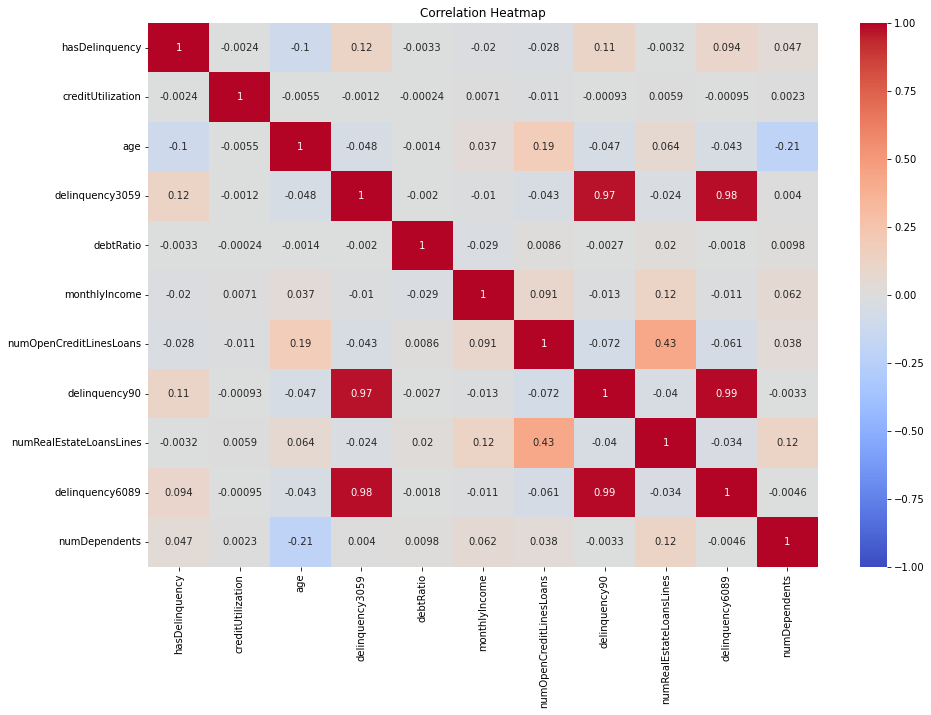

In [13]:
# Correlation matrix
correlation_matrix = train_df.corr()
# Correlation heatmap with bar from -1 to 1
fig, ax = plt.subplots(
    figsize=(15, 10)
)

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    ax=ax
)
ax.set_title('Correlation Heatmap')

## Outliers

In [14]:
columns_names = train_df.columns.to_list()

Plotting boxplot for creditUtilization
Plotting boxplot for age
Plotting boxplot for delinquency3059
Plotting boxplot for debtRatio
Plotting boxplot for monthlyIncome
Plotting boxplot for numOpenCreditLinesLoans
Plotting boxplot for delinquency90
Plotting boxplot for numRealEstateLoansLines
Plotting boxplot for delinquency6089
Plotting boxplot for numDependents


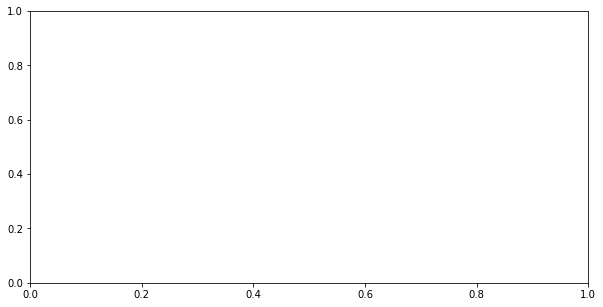

In [15]:
# Box plot for each variable with sns in order to detect outliers
fig, ax = plt.subplots(
    figsize=(10, 5)
)


for column in columns_names:

    if column == 'hasDelinquency':
        continue

    print(f"Plotting boxplot for {column}")

    sns.boxplot(
        data=train_df,
        x=column,
        orient='h',
        palette='Set2',
        ax=ax
    )

    ax.set_title(f'Boxplot for {column}')

    fig.savefig(f'images/boxplot_{column}.pdf')

    # clear the axis
    ax.cla()


In [31]:
# Detect outliers using z-score method
z_scores = stats.zscore(train_df.drop("hasDelinquency", axis=1))
threshold = 3

In [ ]:
# Perform scaling or normalization using sklearn

# Min-Max Scaling
scaler = MinMaxScaler()
data['column_name_scaled'] = scaler.fit_transform(data[['column_name']])

# Standardization
scaler = StandardScaler()
data['column_name_standardized'] = scaler.fit_transform(data[['column_name']])
